# LUNA Lung Segmentation ROI


# Dependency Descriptions
1. **skimage.morphology**: Morphological operations, e.g., opening or skeletonization.
2. **skimage.measure**: Measurement of image properties, e.g., similarity and contours.
3. **sklearn.cluster.KMeans**: clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares
4. **skimage.transform.resize**: Geometric and other transforms, e.g., rotation or the Radon transform.

In [1]:
import numpy as np
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize
from glob import glob

In [2]:
WORKING_PATH = "../../../../output/build-simple-model/"
FILE_LIST = glob(WORKING_PATH + "images_*.npy")

In [3]:
# run the program through a single set of images for demonstration
for img_file in FILE_LIST:
    print(img_file)

../../../../output/build-simple-model\images_0001_0023.npy


In [4]:
    imgs_to_process = np.load(img_file).astype(np.float64) # load the image as numpy array in float64
    print("on image", img_file)
    print(imgs_to_process)

on image ../../../../output/build-simple-model\images_0001_0023.npy
[[[-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  ..., 
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]]

 [[-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  ..., 
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]]

 [[-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  ..., 
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -2048. -2048.]
  [-2048. -2048. -2048. ..., -2048. -

In [5]:
    for i in range(len(imgs_to_process)):
        print(i) # only 3 images in the numpy arrray (for the 3 layers)

0
1
2


In [6]:
i = 0 # for demonstration, the next parts will be done with i = 0 (only one image)
img = imgs_to_process[i] # this is the img (a two dimensional numpy array)
#Standardize the pixel values
mean = np.mean(img)
std = np.std(img)
img = img-mean
img = img/std # to standardize values you subtract mean and divide by standard deviation
# note: A standardized variable is a variable that has been rescaled to have a mean of zero and a standard deviation of one

In [7]:
# Find the average pixel value near the lungs
# to renormalize washed out images
middle = img[100:400,100:400] # grabs the all pixels excluding pixels in a 100px border of the image 
mean = np.mean(middle)  # new mean which is the mean of pixels in the middle
max = np.max(img) # max values in the current standardized pixel spectrum
min = np.min(img) # min values in the current standardized pixel spectrum
# To improve threshold finding, I'm moving the 
# underflow and overflow on the pixel spectrum
img[img==max]=mean 
img[img==min]=mean # take all max/min values, and set them to mean values for sake of thresholding (so that the extreme outliers do not screw up the means)

In [8]:
# Using Kmeans to separate foreground (radio-opaque tissue)
# and background (radio transparent tissue ie lungs)
# Doing this only on the center of the image to avoid 
# the non-tissue parts of the image as much as possible

# kmeans algorithm: finds clusters in data 
# first initialize 2 centroids, then loop through these two steps until convergence:
# assign all points to one of the two centroids, find mean of points, relocate centroid
kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1])) # perform kmeans on the values in the middle
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
print(middle.shape)
print(np.prod(middle.shape)) # multiply elements
print(np.reshape(middle,[np.prod(middle.shape),1])) # Gives a new shape to an array without changing its data (now it is just a long list of numbers)
print(kmeans) # at this point kmeans has been performed on the middle array
print(kmeans.cluster_centers_) # each centroid is defined by a single value as pixel values are singlular values
print(kmeans.cluster_centers_.flatten())
print(sorted(kmeans.cluster_centers_.flatten())) # this will give you the two centroids which represent the two clusters of pixels in the image
print(np.mean(centers)) # averaging the centroids: gives you a dividing threshold that distinguishes the two clusters of pixels
print(np.where(img<threshold,1.0,0.0)) # where the image is less than the threshold make them 1, and greater make them 0 (thus segmenting lungs as 1, nonlungs as 0)

(300, 300)
90000
[[-0.25934945]
 [-0.25557844]
 [-0.26060646]
 ..., 
 [ 0.98885633]
 [ 1.01776744]
 [ 0.91846406]]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 1.05730228]
 [-0.01335521]]
[ 1.05730228 -0.01335521]
[-0.013355206424837673, 1.0573022779300885]
0.521973535753
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


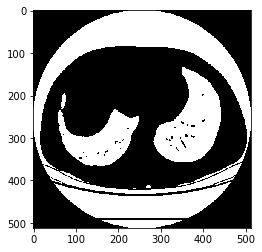

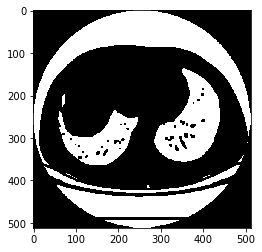

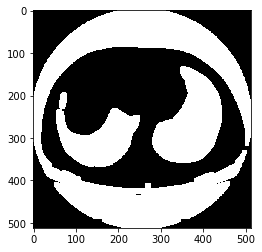

In [9]:
# I found an initial erosion helful for removing graininess from some of the regions
# and then large dialation is used to make the lung region 
# engulf the vessels and incursions into the lung cavity by 
# radio opaque tissue
eroded = morphology.erosion(thresh_img,np.ones([4,4]))
dilation = morphology.dilation(eroded,np.ones([10,10]))

import pylab
pylab.imshow(thresh_img, cmap=pylab.cm.bone) 
pylab.show()
# erosion: shrinks bright regions, enlarges dark regions
# the larger the neighborhood array you give it (the more it shrinks and enlarges)
# For more understanding look at this example: https://en.wikipedia.org/wiki/Erosion_(morphology)#Example
pylab.imshow(eroded, cmap=pylab.cm.bone) # removes graininess
pylab.show()
# dilation: shrinks dark regions, enlarges bright regions
pylab.imshow(dilation, cmap=pylab.cm.bone) # makes sure insides of lungs (vessels) as well as a little around lungs is contained in final image (as this is a mask that will be overlaid)
pylab.show()

[[1 0 0]
 [1 1 2]
 [0 0 2]]


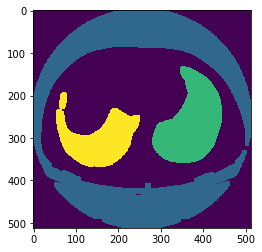

[0 1 2 3]
[<skimage.measure._regionprops._RegionProperties object at 0x0000014C7B5B4048>, <skimage.measure._regionprops._RegionProperties object at 0x0000014C7B5B4198>, <skimage.measure._regionprops._RegionProperties object at 0x0000014C7B5B41D0>]


In [10]:
#  Label each region and obtain the region properties
#  The background region is removed by removing regions 
#  with a bbox that is to large in either dimnsion
#  Also, the lungs are generally far away from the top 
#  and bottom of the image, so any regions that are too
#  close to the top and bottom are removed
#  This does not produce a perfect segmentation of the lungs
#  from the image, but it is surprisingly good considering its
#  simplicity.
labels = measure.label(dilation)
label_vals = np.unique(labels)
regions = measure.regionprops(labels)

x = np.array([[1, 0, 0], [1, 1, 5], [0, 0, 5]])
print(measure.label(x)) # as you can tell, label will give a label to every region with the same pixel values
pylab.imshow(labels, cmap = 'viridis') 
pylab.show()
print(label_vals) # there are 4 labeled regions, and as shown in the image, the purple, blue, yellow and cyan indicate different labels
print(regions) # measure properties of labeled image regions

In [11]:
good_labels = []
for prop in regions:
    print(prop) # there are 3 props
    print(prop.label) # the 0 labeled prop (purple region above) is excluded (as it is not useful for lung mask anyways)
    B = prop.bbox
    print(B)
    
    # look for in both x and y dimensions, is the region small enough (large regions probably do not contain lungs)
    # then look to see if the region is towards the center of the image (away from the side regions probably contain lungs)
    # if the region is small enough, and away from the sides of the image, then it contains the lungs
    if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472: 
        good_labels.append(prop.label)
print(good_labels)
mask = np.ndarray([512,512],dtype=np.int8)
mask[:] = 0 # create a mask with all 0s

1
(0, 0, 512, 512)
2
(131, 280, 360, 443)
3
(193, 54, 368, 251)
[2, 3]


In [12]:
#  The mask here is the mask for the lungs--not the nodes
#  After just the lungs are left, we do another large dilation
#  in order to fill in and out the lung mask 
for N in good_labels: # for all the good labels
    # where the label is a good label in the image, set that region in the mask to the value of 1
    mask = mask + np.where(labels==N,1,0)
mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
imgs_to_process[i] = mask

# create a new file (in same path, and identification number), and save the lung masks
np.save(img_file.replace("images","lungmask"),imgs_to_process)

on image ../../../../output/build-simple-model\images_0001_0023.npy


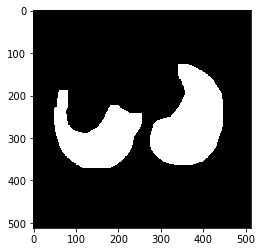

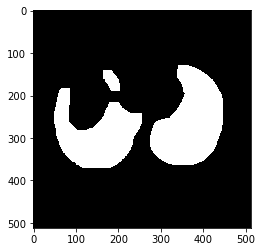

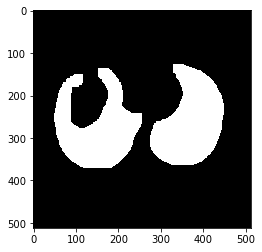

In [13]:
# create the 3 lung masks and save them to correct location
# this is so you can work with them later in the sandbox
for img_file in FILE_LIST:
    # I ran into an error when using Kmean on np.float16, so I'm using np.float64 here
    imgs_to_process = np.load(img_file).astype(np.float64) 
    print("on image", img_file)
    for i in range(len(imgs_to_process)):
        img = imgs_to_process[i]
        #Standardize the pixel values
        mean = np.mean(img)
        std = np.std(img)
        img = img-mean
        img = img/std
        # Find the average pixel value near the lungs
        # to renormalize washed out images
        middle = img[100:400,100:400] 
        mean = np.mean(middle)  
        max = np.max(img)
        min = np.min(img)
        # To improve threshold finding, I'm moving the 
        # underflow and overflow on the pixel spectrum
        img[img==max]=mean
        img[img==min]=mean
        #
        # Using Kmeans to separate foreground (radio-opaque tissue)
        # and background (radio transparent tissue ie lungs)
        # Doing this only on the center of the image to avoid 
        # the non-tissue parts of the image as much as possible
        #
        kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
        centers = sorted(kmeans.cluster_centers_.flatten())
        threshold = np.mean(centers)
        thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
        #
        # I found an initial erosion helful for removing graininess from some of the regions
        # and then large dialation is used to make the lung region 
        # engulf the vessels and incursions into the lung cavity by 
        # radio opaque tissue
        #
        eroded = morphology.erosion(thresh_img,np.ones([4,4]))
        dilation = morphology.dilation(eroded,np.ones([10,10]))
        #
        #  Label each region and obtain the region properties
        #  The background region is removed by removing regions 
        #  with a bbox that is to large in either dimnsion
        #  Also, the lungs are generally far away from the top 
        #  and bottom of the image, so any regions that are too
        #  close to the top and bottom are removed
        #  This does not produce a perfect segmentation of the lungs
        #  from the image, but it is surprisingly good considering its
        #  simplicity. 
        #
        labels = measure.label(dilation)
        label_vals = np.unique(labels)
        regions = measure.regionprops(labels)
        good_labels = []
        for prop in regions:
            B = prop.bbox
            if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
                good_labels.append(prop.label)
        mask = np.ndarray([512,512],dtype=np.int8)
        mask[:] = 0
        #
        #  The mask here is the mask for the lungs--not the nodes
        #  After just the lungs are left, we do another large dilation
        #  in order to fill in and out the lung mask 
        #
        for N in good_labels:
            mask = mask + np.where(labels==N,1,0)
        mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
        imgs_to_process[i] = mask
        pylab.imshow(mask, cmap=pylab.cm.bone) 
        pylab.show()
    np.save(img_file.replace("images","lungmask"),imgs_to_process)

In [14]:
FILE_LIST = glob(WORKING_PATH + "lungmask_*.npy") # get all lung masks
out_images = []      #final set of images
out_nodemasks = []   #final set of nodemasks

In [15]:
for fname in FILE_LIST:
    print("working on file ", fname)
    imgs_to_process = np.load(fname.replace("lungmask","images")) # original lung image
    masks = np.load(fname) # lung mask created from before
    node_masks = np.load(fname.replace("lungmask","masks")) # node masks created from before

working on file  ../../../../output/build-simple-model\lungmask_0001_0023.npy


In [16]:
for i in range(len(imgs_to_process)):
    print(i) # only 3 images in the numpy arrray (for the 3 layers)

0
1
2


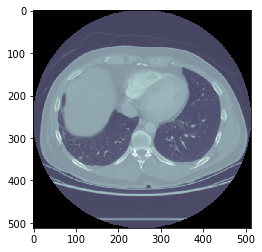

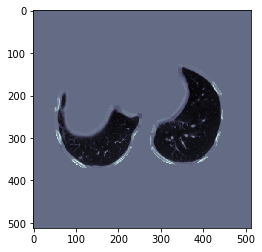

In [17]:
i = 0 # for demonstration, the next parts will be done with i = 0 (only one image)
mask = masks[i] # get lung mask for that img
node_mask = node_masks[i] # get node mask for that img
img = imgs_to_process[i] # get lung img for that img

pylab.imshow(img, cmap=pylab.cm.bone) # before lung mask is applied
pylab.show()

new_size = [512,512]   # we're scaling back up to the original size of the image
img= mask*img          # apply lung mask

pylab.imshow(img, cmap=pylab.cm.bone) # when lung mask is applied
pylab.show()

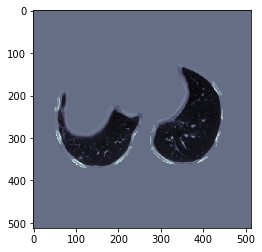

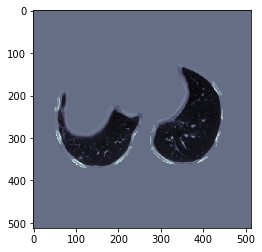

In [18]:
# renormalizing the masked image (in the mask region)
new_mean = np.mean(img[mask>0]) # mean of all values greater than 0
new_std = np.std(img[mask>0]) # std of all values greater than 0

#  Pulling the background color up to the lower end
#  of the pixel range for the lungs
old_min = np.min(img)       # background color
img[img==old_min] = new_mean-1.2*new_std   # resetting backgound color
# -1.2*new_std chosen empiracally (by means of observation or experience)

pylab.imshow(img, cmap=pylab.cm.bone) # after resetting background color
pylab.show()

img = img-new_mean
img = img/new_std

pylab.imshow(img, cmap=pylab.cm.bone) # after renormalizing
pylab.show()

In [19]:
# make image bounding box  (min row, min col, max row, max col)
labels = measure.label(mask)
regions = measure.regionprops(labels)
print(labels)
print(regions)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[<skimage.measure._regionprops._RegionProperties object at 0x0000014C7B5B49B0>, <skimage.measure._regionprops._RegionProperties object at 0x0000014C7DE8BC50>]


In [20]:
# Finding the global min and max row over all regions
# A bounding box has these dimensions (min row, min col, max row, max col)
min_row = 512
max_row = 0
min_col = 512
max_col = 0
for prop in regions:
    print(prop)
    B = prop.bbox
    print(B)
    # to understand these if statements, run through the for loop first using one region then the next and it makes sense
    if min_row > B[0]:
        min_row = B[0]
    if min_col > B[1]:
        min_col = B[1]
    if max_row < B[2]:
        max_row = B[2]
    if max_col < B[3]:
        max_col = B[3]
width = max_col - min_col
height = max_row - min_row
# this ensures that the bounding box is a square (the length of square's side is longer one of: width and height)
if width > height:
    max_row = min_row + width
else:
    max_col = min_col + height
# in the end you end up with a square bounding box that encompases the entire lung region

(126, 275, 364, 447)
(188, 49, 372, 255)


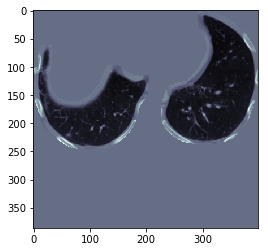

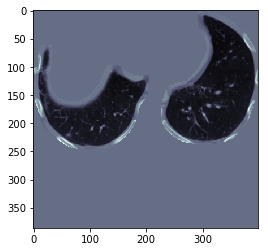

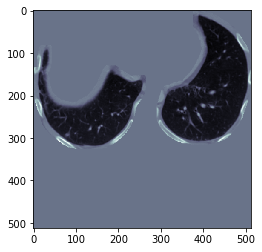

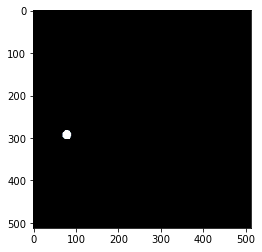

In [21]:
# cropping the image down to the bounding box for all regions
# (there's probably an skimage command that can do this in one line) 
img = img[min_row:max_row,min_col:max_col]

pylab.imshow(img, cmap=pylab.cm.bone) # cropped img
pylab.show()

mask =  mask[min_row:max_row,min_col:max_col] # is there any use in cropping the mask? if you dont use it furthur?

pylab.imshow(img, cmap=pylab.cm.bone) # cropped mask
pylab.show()

if max_row-min_row <5 or max_col-min_col<5:  # skipping all images with no good regions
    # even though it may seem this will screw up the classifier...
    # this will not as the training set will simply contain one less lung image, and node mask image 
    # (as the node mask image is created below so it is passed over as well)
    pass
else:
    # moving range to -1 to 1 to accomodate the resize function
    mean = np.mean(img)
    img = img - mean
    min = np.min(img)
    max = np.max(img)
    img = img/(max-min) # by subtracting mean and dividing by range, values are inbetween -1 and 1
    new_img = resize(img,[512,512])
    
    pylab.imshow(new_img, cmap=pylab.cm.bone) # resized img
    pylab.show()
    
    new_node_mask = resize(node_mask[min_row:max_row,min_col:max_col],[512,512]) # get cropped/resized node mask
    
    pylab.imshow(new_node_mask, cmap=pylab.cm.bone) # cropped and resized img
    pylab.show()
    
    out_images.append(new_img) # append the lung img
    out_nodemasks.append(new_node_mask) # append the node mask